<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Previs%C3%A3o_pre%C3%A7o_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#importando as bibliotecas
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [50]:
#lendo o arquivo de ações
#Lendo csv

Cotacoes = yf.Ticker("ITUB4.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-07 00:00:00-03:00,29.86,30.00,29.69,29.89,15689500,0.00,0.00
2019-11-08 00:00:00-03:00,29.52,29.86,29.24,29.45,15088000,0.00,0.00
2019-11-11 00:00:00-03:00,29.39,29.88,29.15,29.58,17480000,0.00,0.00
2019-11-12 00:00:00-03:00,29.24,29.46,28.76,29.07,19644000,0.00,0.00
2019-11-13 00:00:00-03:00,28.96,29.10,28.56,28.78,17688000,0.00,0.00


In [51]:
# Retira o indice do campo data

dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-11-07 00:00:00-03:00,29.86,30.00,29.69,29.89,15689500,0.00,0.00
1,2019-11-08 00:00:00-03:00,29.52,29.86,29.24,29.45,15088000,0.00,0.00
2,2019-11-11 00:00:00-03:00,29.39,29.88,29.15,29.58,17480000,0.00,0.00
3,2019-11-12 00:00:00-03:00,29.24,29.46,28.76,29.07,19644000,0.00,0.00
4,2019-11-13 00:00:00-03:00,28.96,29.10,28.56,28.78,17688000,0.00,0.00


In [52]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1240,2024-11-01 00:00:00-03:00,35.00,35.30,34.79,34.81,22751600,0.02,0.00
1241,2024-11-04 00:00:00-03:00,35.13,35.54,34.89,35.28,20499900,0.00,0.00
1242,2024-11-05 00:00:00-03:00,35.70,36.65,35.60,36.34,52524800,0.00,0.00
1243,2024-11-06 00:00:00-03:00,35.87,36.43,35.52,36.17,38887000,0.00,0.00
1244,2024-11-07 00:00:00-03:00,36.13,36.48,35.56,35.66,10884700,0.00,0.00


In [ ]:
#dados.drop(dados.tail(1).index,inplace=True)
#dados.tail()

In [ ]:
#dados.tail()

In [53]:
# Vamos escluir as colunas que não serão utilizadas e renomear os campos

dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data', 'Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2019-11-07 00:00:00-03:00,29.86,30.00,29.69,29.89,15689500
1,2019-11-08 00:00:00-03:00,29.52,29.86,29.24,29.45,15088000
2,2019-11-11 00:00:00-03:00,29.39,29.88,29.15,29.58,17480000
3,2019-11-12 00:00:00-03:00,29.24,29.46,28.76,29.07,19644000
4,2019-11-13 00:00:00-03:00,28.96,29.10,28.56,28.78,17688000


In [54]:
dados.tail()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
1240,2024-11-01 00:00:00-03:00,35.00,35.30,34.79,34.81,22751600
1241,2024-11-04 00:00:00-03:00,35.13,35.54,34.89,35.28,20499900
1242,2024-11-05 00:00:00-03:00,35.70,36.65,35.60,36.34,52524800
1243,2024-11-06 00:00:00-03:00,35.87,36.43,35.52,36.17,38887000
1244,2024-11-07 00:00:00-03:00,36.13,36.48,35.56,35.66,10884700


In [55]:
# Vamos observar o nosso range de dados

print('Menor data: ', dados['Data'].min())
print('Maior data: ', dados['Data'].max())

Menor data:  2019-11-07 00:00:00-03:00
Maior data:  2024-11-07 00:00:00-03:00


In [56]:
# Vamos observar os dados refernte a última data do nosso conjunto de dados

display(dados.loc[dados['Data'] == dados['Data'].max()])

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
1244,2024-11-07 00:00:00-03:00,36.13,36.48,35.56,35.66,10884700


In [57]:
# Tipo de dados

dados.dtypes

,0
Data,"datetime64[ns, America/Sao_Paulo]"
Abertura,float64
Maximo,float64
Minimo,float64
Fechamento,float64
Volume,int64


In [58]:
# Volume de dados

dados.shape

(1245, 6)

In [59]:
# Sumário estatístico

dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1245.00,1245.00,1245.00,1245.00,1245.00
mean,25.23,25.55,24.92,25.22,33269826.27
std,4.66,4.64,4.69,4.67,15734177.54
min,17.62,17.75,16.52,16.95,8159900.00
25%,21.85,22.15,21.52,21.80,22551800.00
50%,24.23,24.62,23.96,24.24,30196700.00
75%,27.66,28.01,27.32,27.67,40653500.00
max,37.26,37.47,36.83,37.16,160669900.00


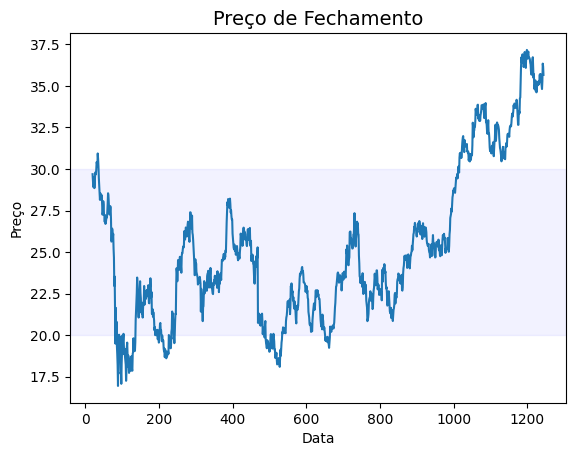

In [87]:
# Plot
plt.plot(dados['Fechamento'])
plt.title('Preço de Fechamento', size=14)

# Get the current axes object and then call axhspan
plt.gca().axhspan(ymin=20, ymax=30, alpha=0.05, color='blue')
# ymin and ymax specify the vertical extent, alpha controls transparency

plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

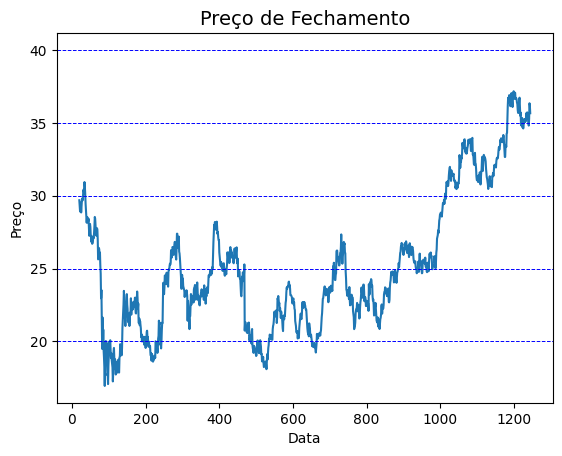

In [90]:
# prompt: plotar o gráfico acima com linhas hotizontais

# ... (Your existing code)

# Plot
plt.plot(dados['Fechamento'])
plt.title('Preço de Fechamento', size=14)

# Add horizontal lines at specific prices
horizontal_lines = [20, 25, 30, 35, 40] # Example prices
for price in horizontal_lines:
    plt.axhline(y=price, color='b', linestyle='--', linewidth=0.7)


plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

In [61]:
# Criando novos campos de média móvel com 5 dias, 14 dias e 21 dias

dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [62]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2019-11-07 00:00:00-03:00,29.86,30.00,29.69,29.89,15689500,NaN,NaN,NaN
1,2019-11-08 00:00:00-03:00,29.52,29.86,29.24,29.45,15088000,NaN,NaN,NaN
2,2019-11-11 00:00:00-03:00,29.39,29.88,29.15,29.58,17480000,NaN,NaN,NaN
3,2019-11-12 00:00:00-03:00,29.24,29.46,28.76,29.07,19644000,NaN,NaN,NaN
4,2019-11-13 00:00:00-03:00,28.96,29.10,28.56,28.78,17688000,29.35,NaN,NaN
5,2019-11-14 00:00:00-03:00,28.82,29.06,28.55,28.97,14012300,29.17,NaN,NaN
6,2019-11-18 00:00:00-03:00,29.23,29.39,28.81,28.84,13345400,29.05,NaN,NaN
7,2019-11-19 00:00:00-03:00,28.82,28.90,28.29,28.52,17887600,28.84,NaN,NaN
8,2019-11-21 00:00:00-03:00,28.52,28.82,28.44,28.81,26063800,28.78,NaN,NaN
9,2019-11-22 00:00:00-03:00,28.63,29.09,28.59,29.01,16433000,28.83,NaN,NaN


In [63]:
dados.dropna(inplace=True)

In [64]:
dados.shape

(1225, 9)

In [66]:
#verificando quantidade de linhas
qtd_linhas = len(dados)
qtd_linhas_treino=qtd_linhas -400
qtd_linhas_teste = qtd_linhas -20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validação= {qtd_linhas_teste}:{qtd_linhas}"
)

info


'linhas treino= 0:825 linhas teste= 825:1205 linhas validação= 1205:1225'

In [67]:
# Separando variáveis preditoras das variáveis alvo

preditoras = dados.drop(['Data','Fechamento','Volume'], axis=1)
target = dados['Fechamento']

In [68]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,29.24,29.95,29.05,29.36,28.78,28.93
21,29.69,29.87,29.06,29.48,28.83,28.90
22,29.65,29.78,28.88,29.33,28.84,28.87
23,29.20,29.31,28.71,29.18,28.83,28.84
24,29.11,29.57,28.74,29.26,28.90,28.86


In [69]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [70]:
# Verificando a normalização realizada
print ('preditoras: ',preditoras_normalizadas.shape)
print (preditoras_normalizadas)

preditoras:  (1225, 6)
[[0.59151326 0.61884454 0.61724787 0.59955435 0.56883552 0.5781466 ]
 [0.61425876 0.61431301 0.61764721 0.60579646 0.5716739  0.57649211]
 [0.61219146 0.6101944  0.60884892 0.59758767 0.57206683 0.57511145]
 ...
 [0.92043158 0.9583691  0.9396105  0.91376558 0.92278326 0.92023481]
 [0.92908746 0.94721226 0.93567132 0.92363796 0.92694403 0.92241124]
 [0.94232612 0.94974785 0.937641   0.93056142 0.92847978 0.92495049]]


In [71]:
#Separa os dados de treino, teste e validação
X_train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

y_train = target[:qtd_linhas_treino]
y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

825 825
380 380


In [72]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
predicao = lr.predict(X_test)
cd = r2_score(y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:99.87'

In [73]:
#rede neural
rn = MLPRegressor(max_iter=2000)
rn.fit(X_train, y_train)
pred= rn.predict(X_test)

cd = rn.score(X_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:97.23'

In [74]:
#executando a previsão

previsao=preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]

data_pregao_full=dados['Data']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full= dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregao':data_pregao, 'Real':res, 'Previsao':pred})
df['Real'] = df['Real'].shift(+1)

df.set_index('Data_Pregao', inplace=True)

print(df)


                           Real  Previsao
Data_Pregao                              
2024-10-11 00:00:00-03:00   NaN     34.66
2024-10-14 00:00:00-03:00 34.61     34.82
2024-10-15 00:00:00-03:00 34.83     35.00
2024-10-16 00:00:00-03:00 35.23     34.88
2024-10-17 00:00:00-03:00 35.02     35.06
2024-10-18 00:00:00-03:00 35.09     35.13
2024-10-21 00:00:00-03:00 35.26     35.05
2024-10-22 00:00:00-03:00 35.08     34.98
2024-10-23 00:00:00-03:00 35.14     35.23
2024-10-24 00:00:00-03:00 35.36     35.57
2024-10-25 00:00:00-03:00 35.68     35.32
2024-10-28 00:00:00-03:00 35.28     35.65
2024-10-29 00:00:00-03:00 35.71     35.46
2024-10-30 00:00:00-03:00 35.33     35.31
2024-10-31 00:00:00-03:00 35.23     35.28
2024-11-01 00:00:00-03:00 35.00     35.02
2024-11-04 00:00:00-03:00 34.81     35.20
2024-11-05 00:00:00-03:00 35.28     36.25
2024-11-06 00:00:00-03:00 36.34     35.95
2024-11-07 00:00:00-03:00 36.17     35.89


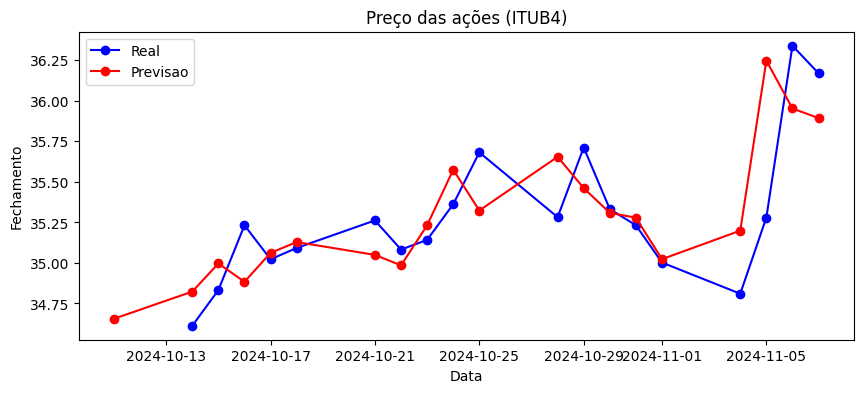

In [75]:
#Gerando o Grafico
plt.figure(figsize=(10,4))
plt.title('Preço das ações (ITUB4)')
plt.plot(df['Real'],label="Real",color='blue', marker='o')
plt.plot(df['Previsao'],label="Previsao",color='red', marker='o')
plt.xlabel('Data')
plt.ylabel('Fechamento')
leg = plt.legend()

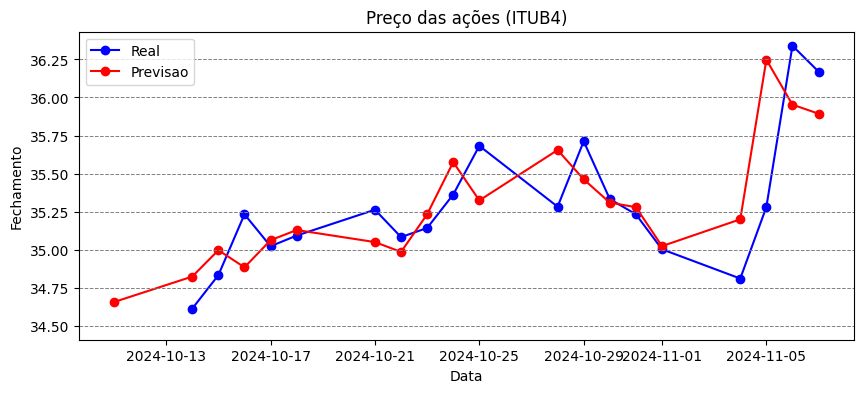

In [92]:
# prompt: usando comando do matplotlib acrescentar linhas horizontais

# ... (Your existing code)

# Plot
plt.figure(figsize=(10, 4))  # Adjust figure size if needed
plt.plot(df['Real'], label="Real", color='blue', marker='o')
plt.plot(df['Previsao'], label="Previsao", color='red', marker='o')
plt.title('Preço das ações (ITUB4)')
plt.xlabel('Data')
plt.ylabel('Fechamento')

# Add horizontal lines at specific prices
horizontal_lines = [34.5, 34.75, 35, 35.25, 35.50, 35.75, 36, 36.25]  # Example prices.  Adjust these to the values you need
for price in horizontal_lines:
    plt.axhline(y=price, color='gray', linestyle='--', linewidth=0.7)

leg = plt.legend()
plt.show()